In [145]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

In [146]:
path =  'C://python//train//'
fallPath = path + 'fall_csv//'
normalPath = path + 'normal_csv//'

In [147]:
fallLabel = []
normalLabel = []

In [148]:
for file in os.listdir(fallPath):
    df = pd.read_csv(fallPath + file)
    for i in range(len(df)):
        fallLabel.append(1)

In [149]:
fallLabel, len(fallLabel)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [150]:
for file in os.listdir(normalPath):
    df = pd.read_csv(normalPath + file)
    for i in range(len(df)):
        normalLabel.append(0)

In [151]:
normalLabel, len(normalLabel)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [152]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [153]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)
label = np.concatenate((fallLabel, normalLabel), axis=0)

In [154]:
len(data), len(label)

(10520, 10520)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=0, shuffle=True)

In [156]:
x_train, len(x_train)

(array([[ 0.47614342,  0.2803385 , -0.22579777, ...,  0.76570183,
          0.26821986,  0.94368404],
        [ 0.42978731,  0.44263369, -0.25379777, ...,  0.79539573,
         -0.38881317,  0.99040502],
        [ 0.34529465,  0.24312812, -0.38964084, ...,  0.80891258,
         -0.12204736,  0.84524256],
        ...,
        [ 0.62325925,  0.98926359, -0.14412712, ...,  0.76390678,
          0.66159582,  0.15149628],
        [ 0.65279937,  0.16581212, -0.06762062, ...,  0.85349095,
         -0.02464593,  0.98251885],
        [ 0.62524992,  0.75435144, -0.63644707, ...,  0.62630212,
          0.81542814,  0.08327276]]),
 7364)

In [157]:
y_train, len(y_train)

(array([1, 0, 0, ..., 1, 0, 1]), 7364)

In [158]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   1.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.979 total time=   1.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.984 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.983 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.7s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [159]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [160]:
grid_pred = grid.predict(x_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       1.00      1.00      1.00      1245

    accuracy                           1.00      3156
   macro avg       1.00      1.00      1.00      3156
weighted avg       1.00      1.00      1.00      3156



In [161]:
cm = confusion_matrix(y_test, grid_pred)

In [162]:
cm

array([[1910,    1],
       [   0, 1245]], dtype=int64)

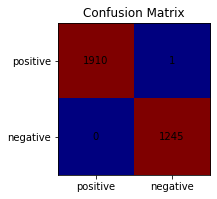

In [163]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

In [164]:
model = SVC(kernel='rbf', C=10, gamma=1)
model.fit(x_train, y_train)
 
# print prediction results
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       1.00      1.00      1.00      1245

    accuracy                           1.00      3156
   macro avg       1.00      1.00      1.00      3156
weighted avg       1.00      1.00      1.00      3156



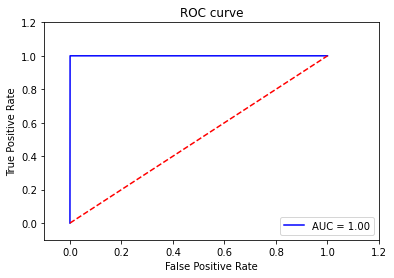

In [165]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [166]:
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
model_cross_val = SVC(kernel='rbf', C=10, gamma=1)
model_cross_val.fit(x_train, y_train)

SVC(C=10, gamma=1)

In [167]:
for score in scoring:
    scores = cross_val_score(model_cross_val, data, label, cv=8, scoring=score)
    print(score, scores.mean())

accuracy 0.867680608365019
precision_macro 0.8729801084777521
recall_macro 0.8732296438525814
f1_macro 0.8645169063466309


In [168]:
joblib.dump(model, path + 'model//model_final.sav')

['C://python//train//model//model_final.sav']